In [49]:
import numpy as np
from scipy import integrate, stats
import pandas as pd
import matplotlib.pyplot as plt
import clipboard

### python

In [34]:
f = lambda x, y: np.array([y[1], -x*y[1]+np.sqrt(x)*y[0]-3*np.exp(-x)])
bc = lambda ya, yb: np.array([ya[0], yb[0]+2*yb[1]])

In [43]:
x = np.linspace(0, 1, 1000)
sol = integrate.solve_bvp(f, bc, x, np.array([np.sin(np.pi*x), np.cos(np.pi*x)]))
sol

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  1.001e-03 ...  9.990e-01  1.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x0000019BE33071F0>
             p: None
             y: [[ 2.168e-19  1.494e-03 ...  4.198e-01  4.195e-01]
                 [ 1.494e+00  1.491e+00 ... -2.093e-01 -2.098e-01]]
            yp: [[ 1.494e+00  1.491e+00 ... -2.093e-01 -2.098e-01]
                 [-3.000e+00 -2.998e+00 ... -4.761e-01 -4.743e-01]]
 rms_residuals: [ 1.198e-07  1.446e-08 ...  2.788e-09  1.247e-09]
         niter: 1

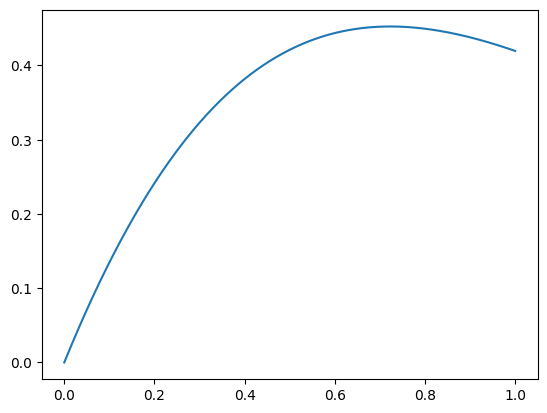

In [60]:
fig, ax = plt.subplots()
ax.plot(x, sol.y[0])
plt.show()

### C++

In [16]:
data = pd.read_table('output/solution.txt', header=None).rename(columns=dict(enumerate(['n', 'x', 'u', 'v'])))

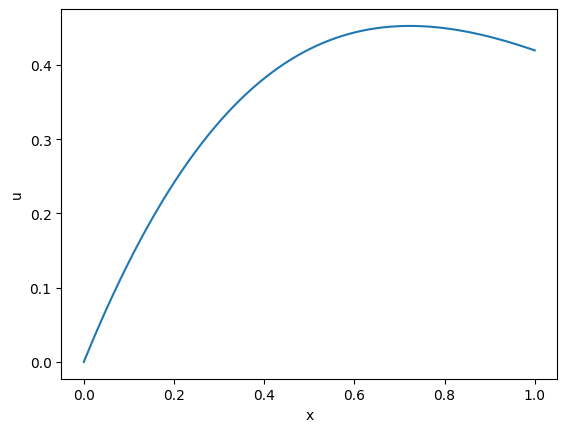

In [27]:
fig, ax = plt.subplots()
ax.plot(*data.query('n == 2000')[['x', 'u']].T.values)
ax.set_xlabel('x')
ax.set_ylabel('u')
# plt.show()
plt.savefig('../IT 3 p/fig1.png', dpi=600, bbox_inches='tight')

In [21]:
data_norm = pd.read_table('output/norm.txt', header=None).rename(columns=dict(enumerate(['n', 'inf', 'i', 'ii'])))

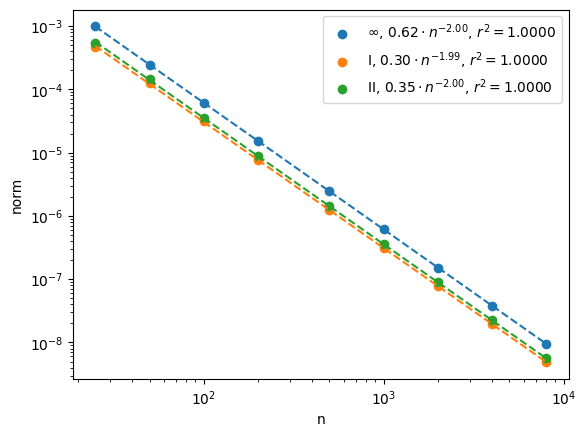

In [40]:
fig, ax = plt.subplots()
for norm_type in data_norm.columns[1:]:
    lr = stats.linregress(np.log(data_norm.n), np.log(data_norm[norm_type]))
    ax.scatter(data_norm.n, data_norm[norm_type], label={'inf': '$\infty$', 'i': 'I', 'ii': 'II'}[norm_type] + f', ${np.exp(lr.intercept): .2f} \\cdot n^{{{lr.slope: .2f}}}$, $r^2 = {lr.rvalue**2 : .4f}$')
    ax.plot([data_norm.n.iloc[0], data_norm.n.iloc[-1]], [data_norm.n.iloc[0]**lr.slope*np.exp(lr.intercept), data_norm.n.iloc[-1]**lr.slope*np.exp(lr.intercept)], ls='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('n')
ax.set_ylabel('norm')
# plt.show()
plt.savefig('../IT 3 p/fig2.png', dpi=600, bbox_inches='tight')

In [51]:
df = data_norm[data_norm.columns[1:]]
clipboard.copy(df[1:].reset_index(drop=True).div(df[:-1].reset_index(drop=True)).T.to_latex(header=None, index=None, float_format='%.3f'))